In [1]:
from collections import namedtuple

In [2]:
namedtuple("CONFIG", ["a", "b"])

__main__.CONFIG

In [1]:
import tensorflow as tf

tf.enable_eager_execution()

In [2]:
tf.keras.initializers.Ones()

In [1]:
from models import build_model

In [2]:
model, vgg_base = build_model(256, 256, dropout=0.4)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
vgg_base.get_layer("block2_conv2").output

<tf.Tensor 'Relu_24:0' shape=(?, 128, 128, 128) dtype=float32>

In [3]:
vgg_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256)     0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 256, 256, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 256, 256, 1)  0           reshape[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 3)  6           lambda[0][0]                     
__________________________________________________________________________________________________
model (Mod

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, UpSampling2D, MaxPooling2D, BatchNormalization


In [6]:
tf.keras.models.load_model("model-best.h5").summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


KeyboardInterrupt: 

In [7]:
from IPython.display import Image

In [8]:
import tensorflow.keras.layers as layers
from tensorflow.keras.initializers import Constant
from tensorflow.keras.models import Model

def build_model(height, width):
    
    concat_axis=3
    inputs = layers.Input(shape=(height, width))
    reshape = layers.Reshape((height, width,1))(inputs)
    
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1_1')(reshape)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2)(conv1)
    
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)(conv2)
    
    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=2)(conv3)

    conv4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    conv4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same', strides=2)(conv4)

    up_conv4 = layers.UpSampling2D(size=(2, 2))(conv4)
    up_conv4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(up_conv4)
    
    up_conv3 = layers.concatenate([conv3, up_conv4], axis=concat_axis)
    up_conv3 = layers.UpSampling2D(size=(2, 2))(up_conv3)
    up_conv3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up_conv3)
    
    up_conv2 = layers.concatenate([conv2, up_conv3], axis=concat_axis)
    up_conv2 = layers.UpSampling2D(size=(2, 2))(up_conv2)
    up_conv2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(up_conv2)
    
    up_conv1 = layers.concatenate([conv1, up_conv2], axis=concat_axis)
    up_conv1 = layers.UpSampling2D(size=(2, 2))(up_conv1)
    up_conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(up_conv1)

    outputs = layers.Conv2D(3, (1, 1), activation='relu', padding='same')(up_conv1)

    return Model(inputs=inputs, outputs=outputs)

In [11]:
from tensorflow.keras.applications import VGG16

In [14]:
vgg_model = VGG16(include_top=False, input_shape=(256, 256, 3))

In [15]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [17]:
vgg_model.

AttributeError: 'Model' object has no attribute 'pop'

In [23]:
import tensorflow.keras.layers as layers
from tensorflow.keras.initializers import Constant
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16

def build_model(height, width):
    inputs = layers.Input(shape=(height, width))
    reshape = layers.Reshape((height, width,1))(inputs)
    
    bn1 = layers.BatchNormalization()(reshape)
    conv1 = layers.Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(bn1)
    conv1 = layers.Conv2D(3, kernel_size = (1,1), padding = 'same', activation = 'relu')(conv1)
    vgg_model = VGG16(include_top=False, input_shape=(height, width, 3))
    vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.get_layer("block5_conv3").output)
    for layer in vgg_model.layers:
        layer.trainable = False
    vgg_out = vgg_model(conv1)  
    
    up4 = layers.UpSampling2D(size=(2, 2))(vgg_out)
    up4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(up4)
    up4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(up4)
    
    up3 = layers.UpSampling2D(size=(2, 2))(up4)
    up3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(up3)
    up3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up3)
    
    up2 = layers.UpSampling2D(size=(2, 2))(up3)
    up2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up2)
    up2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(up2)
    
    up1 = layers.UpSampling2D(size=(2, 2))(up2)
    up1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
    up1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(up1)

    outputs = layers.Conv2D(3, (1, 1), activation='relu', padding='same')(up1)
    return Model(inputs=inputs, outputs=outputs)

In [24]:
model =  vgg_base_model(256, 256)

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 256, 256)          0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 256, 256, 1)       0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 256, 256, 1)       4         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 256, 256, 16)      32        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 256, 256, 3)       51        
_________________________________________________________________
model_2 (Model)              (None, 16, 16, 512)       14714688  
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 32, 32, 512)       0         
__________

In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

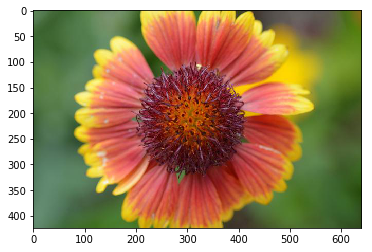

In [27]:
img = Image.open("train/10004197895-flower.jpg")
plt.imshow(np.array(img))

In [28]:
inp = np.array(img.resize((256, 256)).convert("L"))[np.newaxis,:,:].astype(np.float32)

In [29]:
inp.dtype

dtype('float32')

In [30]:
model(inp)

<tf.Tensor 'model_3/conv2d_21/Relu:0' shape=(1, 256, 256, 3) dtype=float32>

In [5]:
# tf.keras.utils.plot_model(model, show_shapes=True)

# Image("model.png")

model = create_model(256, 256, num_class=3)

In [5]:
model.summary()

NameError: name 'model' is not defined

In [26]:
import imgaug as ia
from imgaug import augmenters as iaa

sometimes = lambda aug: iaa.Sometimes(0.9, aug)

aug = iaa.Sequential([
    iaa.CropToFixedSize(256, 256),
#     iaa.Crop(percent=0.2, keep_size=False), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.Flipud(0.5), # vertically flip 20% of all images
    sometimes(iaa.Sharpen()),
    sometimes(iaa.ContrastNormalization())
])

In [6]:
        # apply the following augmenters to most images
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.2), # vertically flip 20% of all images
        # crop images by -5% to 10% of their height/width
        sometimes(iaa.CropAndPad(
            percent=(-0.05, 0.1),
            pad_mode=ia.ALL,
            pad_cval=(0, 255)
        )),

(Sometimes(p=Binomial(Deterministic(float 0.90000000)), name=UnnamedSometimes, then_list=Sequential(name=UnnamedSometimes-then, random_order=False, children=[CropAndPad(name=UnnamedCropAndPad, parameters=[Uniform(Deterministic(float -0.05000000), Deterministic(float 0.10000000)), None, None, None, None, Choice(a=['symmetric', 'maximum', 'reflect', 'constant', 'median', 'minimum', 'mean', 'wrap', 'linear_ramp', 'edge'], replace=True, p=None), DiscreteUniform(Deterministic(int 0), Deterministic(int 255))], deterministic=False)], deterministic=False), else_list=None, deterministic=False),)

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

(640, 424)


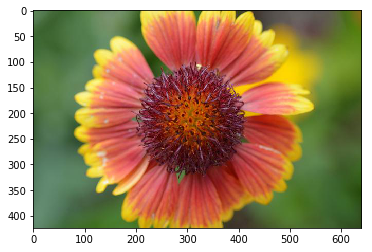

In [29]:
img = Image.open("train/10004197895-flower.jpg")
print(img.size)
plt.imshow(np.array(img))

In [11]:
print(np.array(img).shape)
print(aug.augment_image(np.array(img)).shape)

(424, 640, 3)
(397, 617, 3)


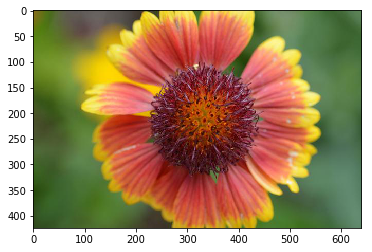

In [28]:
plt.imshow(aug.augment_image(np.array(img)))

(array([ 45438.,  98347., 154626., 173783., 124303.,  60773.,  32389.,
         40466.,  44573.,  39382.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

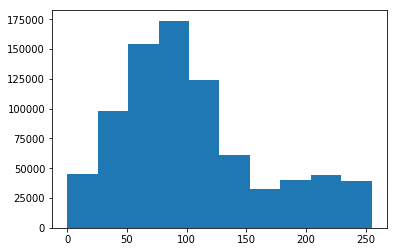

In [10]:
plt.hist(np.array(img).flatten())

(array([ 3741., 13343., 29036., 75849., 69882., 31052., 21460., 14434.,
        10595.,  1968.]),
 array([  6. ,  30.1,  54.2,  78.3, 102.4, 126.5, 150.6, 174.7, 198.8,
        222.9, 247. ]),
 <a list of 10 Patch objects>)

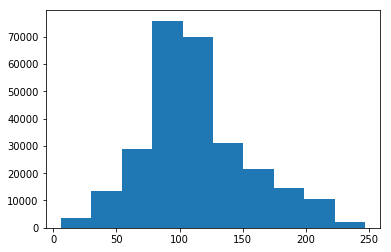

In [11]:
plt.hist(np.array(img.convert("L")).flatten())

In [5]:
import tensorflow as tf

tf.keras.utils.plot_model(model, show_shapes=True)

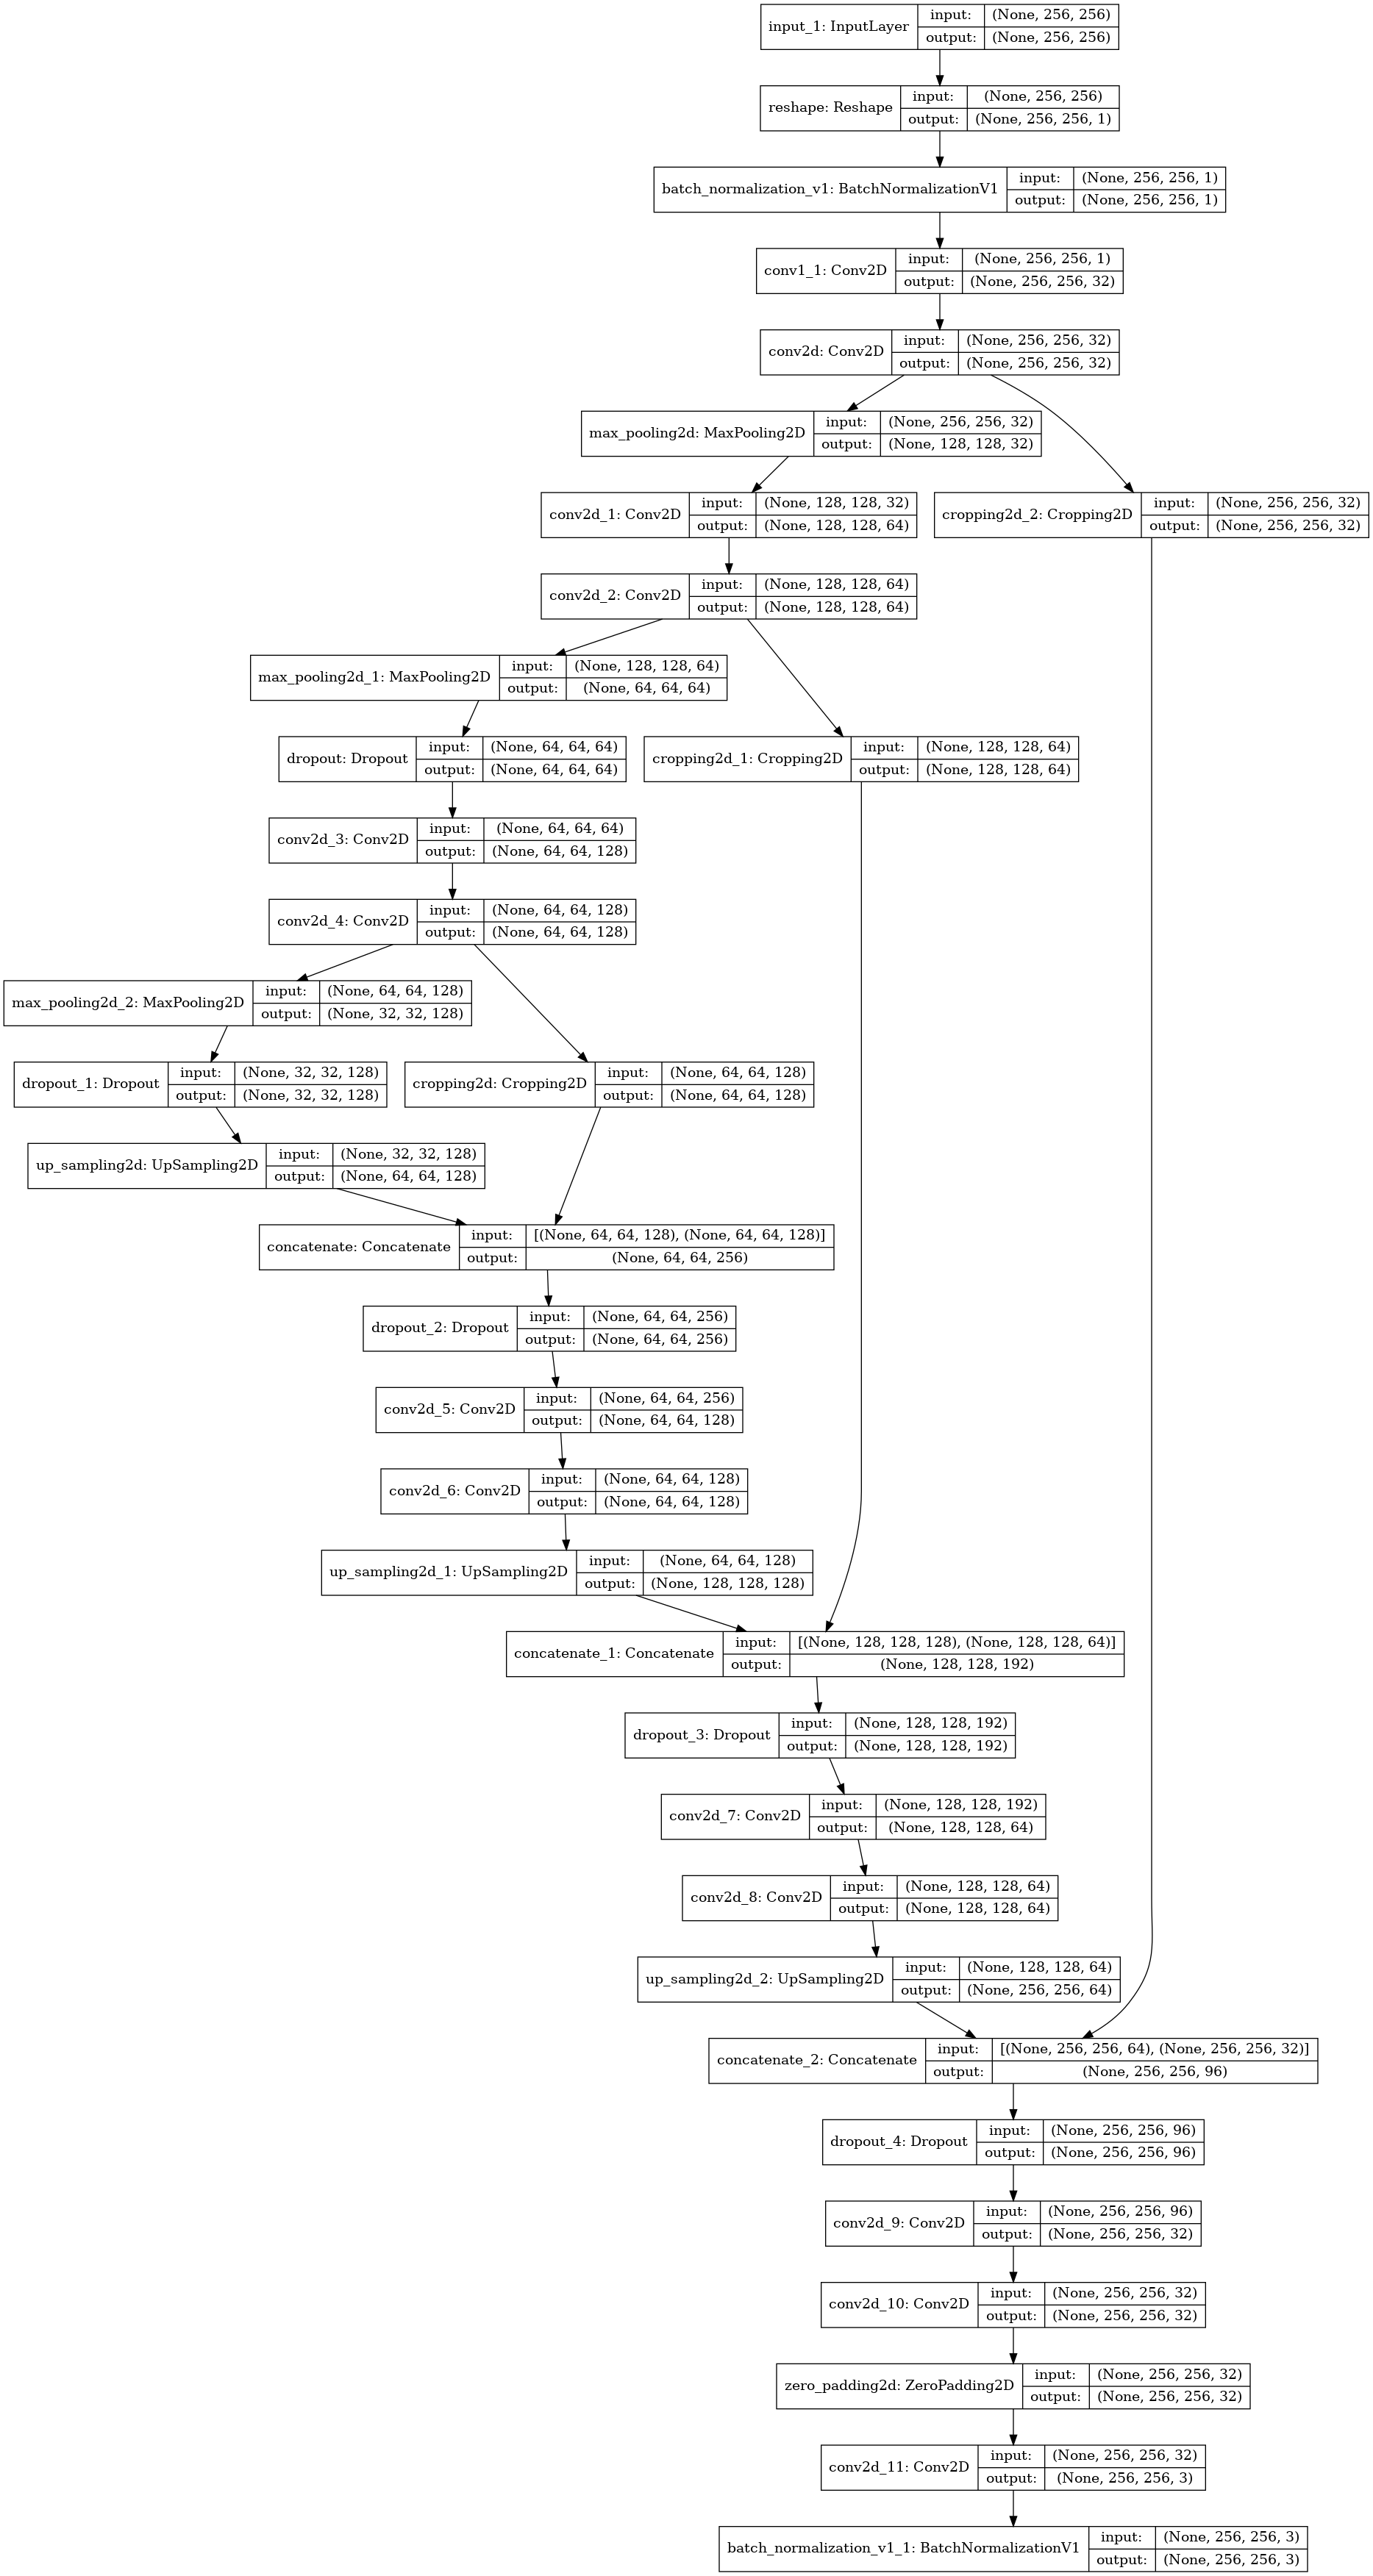